In [8]:
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

data = pd.read_csv('DatasetBalanced.csv')
data = data.loc[:,['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','PaCO2','WBC','SepsisLabel']]
data.info()
x = data.drop(["SepsisLabel"], axis = 1)
y = data.SepsisLabel.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055534 entries, 0 to 2055533
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   HR           float64
 1   O2Sat        float64
 2   Temp         float64
 3   SBP          float64
 4   MAP          float64
 5   DBP          float64
 6   Resp         float64
 7   PaCO2        float64
 8   WBC          float64
 9   SepsisLabel  int64  
dtypes: float64(9), int64(1)
memory usage: 156.8 MB


In [11]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
import time
import numpy as np
feature_names=list(X_train)
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.230 seconds


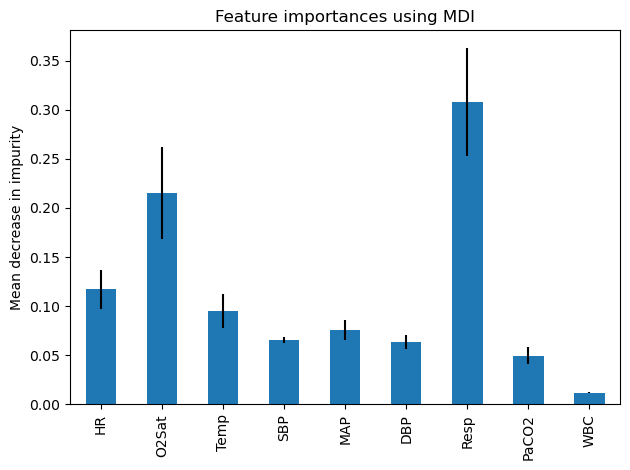

In [15]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [16]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1479.262 seconds


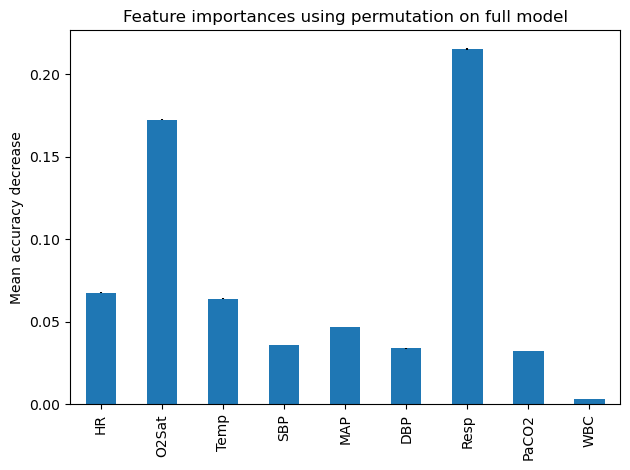

In [17]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

data = pd.read_csv('DatasetBalanced.csv')
data = data.loc[:,['HR','Temp','Resp','PaCO2','SepsisLabel']]
data.info()
x = data.drop(["SepsisLabel"], axis = 1)
y = data.SepsisLabel.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055534 entries, 0 to 2055533
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   HR           float64
 1   Temp         float64
 2   Resp         float64
 3   PaCO2        float64
 4   SepsisLabel  int64  
dtypes: float64(4), int64(1)
memory usage: 78.4 MB


In [19]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
import time
import numpy as np
feature_names=list(X_train)
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.203 seconds


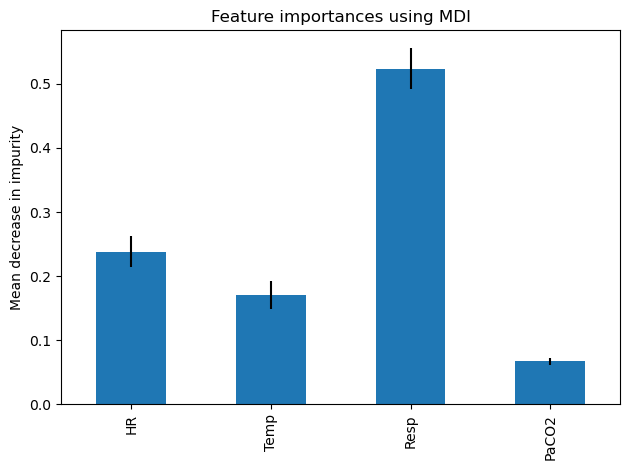

In [21]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

data = pd.read_csv('DatasetBalanced.csv')
data = data.drop(['Unnamed: 0.1','Unnamed: 0','Hour','Patient_ID'],axis=1)
#data = data.loc[:,['HR','Temp','Resp','PaCO2','SepsisLabel']]
data.info()
x = data.drop(["SepsisLabel"], axis = 1)
y = data.SepsisLabel.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055534 entries, 0 to 2055533
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   HR                float64
 1   O2Sat             float64
 2   Temp              float64
 3   SBP               float64
 4   MAP               float64
 5   DBP               float64
 6   Resp              float64
 7   EtCO2             float64
 8   BaseExcess        float64
 9   HCO3              float64
 10  FiO2              float64
 11  pH                float64
 12  PaCO2             float64
 13  SaO2              float64
 14  AST               float64
 15  BUN               float64
 16  Alkalinephos      float64
 17  Calcium           float64
 18  Chloride          float64
 19  Creatinine        float64
 20  Bilirubin_direct  float64
 21  Glucose           float64
 22  Lactate           float64
 23  Magnesium         float64
 24  Phosphate         float64
 25  Potassium         float64
 26  Bilirubin_tota

In [28]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
import time
import numpy as np
feature_names=list(X_train)
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.460 seconds


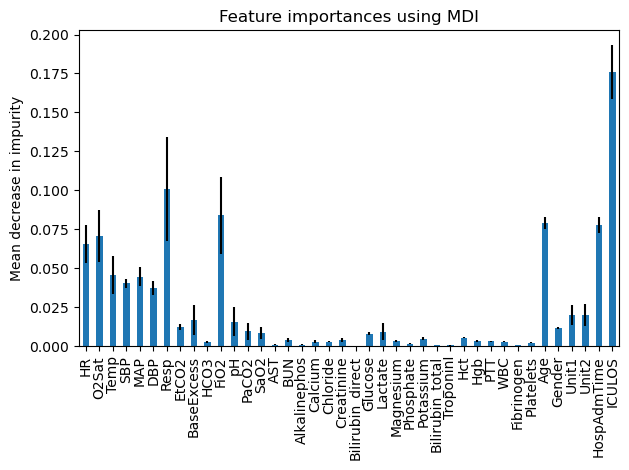

In [30]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()